# Verifica su numpy e matplotlib, 07/12/22, 5Brob

## Esercizio 1, espressioni facciali
Il file `emotions.cv` contiene  9 diverse espressioni facciali. Per ciascun faccia nel file, è presente il tipo di espressione facciale e un'immagine dell'intero viso.
- la colonna *emotions* descrive il tipo di espressione facciale (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral), 
- la colonna *pixels* contiene le immagini, ciascuna di 48x48 pixel dell'espressione facciale. La colonna contiene i 2304 = 48 x 48 valori interi che rappresentano le intensità di grigio dei pixel dell'immagine.

1) Caricate le 9 immagini all'interno di una lista composta da array numpy.

2) Realizzate una sola figura contenente una griglia di 3 x 3 assi sui quali rappresentare le 9 facce. Per ciascuna di esse, indicare la tipologia di espressione facciale nel titolo del grafico relativo. Utilizzare la colormap più idonea.

3) **[FACOLTATIVO DSA]** Ora considerate soltanto la prima immagine del file. Create un istogramma che rappresenti la distribuzione di intensità di grigio dell'immagine.

4) **[FACOLTATIVO DSA]** Considerando soltanto la prima immagine del file, assegnate 0 a tutti i pixel che hanno intensità < 100 e visualizzate l'immagine così trasformata.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [104]:
dati = {"emotion":[], "pixels":[]}
with open("emotion.csv", "r") as f:
    righe = f.readlines()
righe

['emotion,pixels\n',
 '0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 

In [105]:
for elemento in righe[1:]:
    lista = elemento[:-1].split(",")
    dati["emotion"].append(int(lista[0]))
    x = lista[1].split(" ")
    x = [float(s) for s in x]
    dati["pixels"].append(x)
for nome, d in dati.items():
    dati[nome] = np.array(d)

(9, 2304)

In [107]:
lista = []
for i in dati["pixels"]:
    lista.append(i.reshape((48, 48)))
lista

[array([[ 70.,  80.,  82., ...,  52.,  43.,  41.],
        [ 65.,  61.,  58., ...,  56.,  52.,  44.],
        [ 50.,  43.,  54., ...,  49.,  56.,  47.],
        ...,
        [ 91.,  65.,  42., ...,  72.,  56.,  43.],
        [ 77.,  82.,  79., ..., 105.,  70.,  46.],
        [ 77.,  72.,  84., ..., 106., 109.,  82.]]),
 array([[151., 150., 147., ..., 129., 140., 120.],
        [151., 149., 149., ..., 122., 141., 137.],
        [151., 151., 156., ..., 109., 123., 146.],
        ...,
        [188., 188., 121., ..., 185., 185., 186.],
        [188., 187., 196., ..., 186., 182., 187.],
        [186., 184., 185., ..., 193., 183., 184.]]),
 array([[231., 212., 156., ...,  44.,  27.,  16.],
        [229., 175., 148., ...,  27.,  35.,  27.],
        [214., 156., 157., ...,  28.,  22.,  28.],
        ...,
        [241., 245., 250., ...,  57., 101., 146.],
        [246., 250., 252., ...,  78., 105., 162.],
        [250., 251., 250., ...,  88., 110., 152.]]),
 array([[ 24.,  32.,  36., ..., 173.,

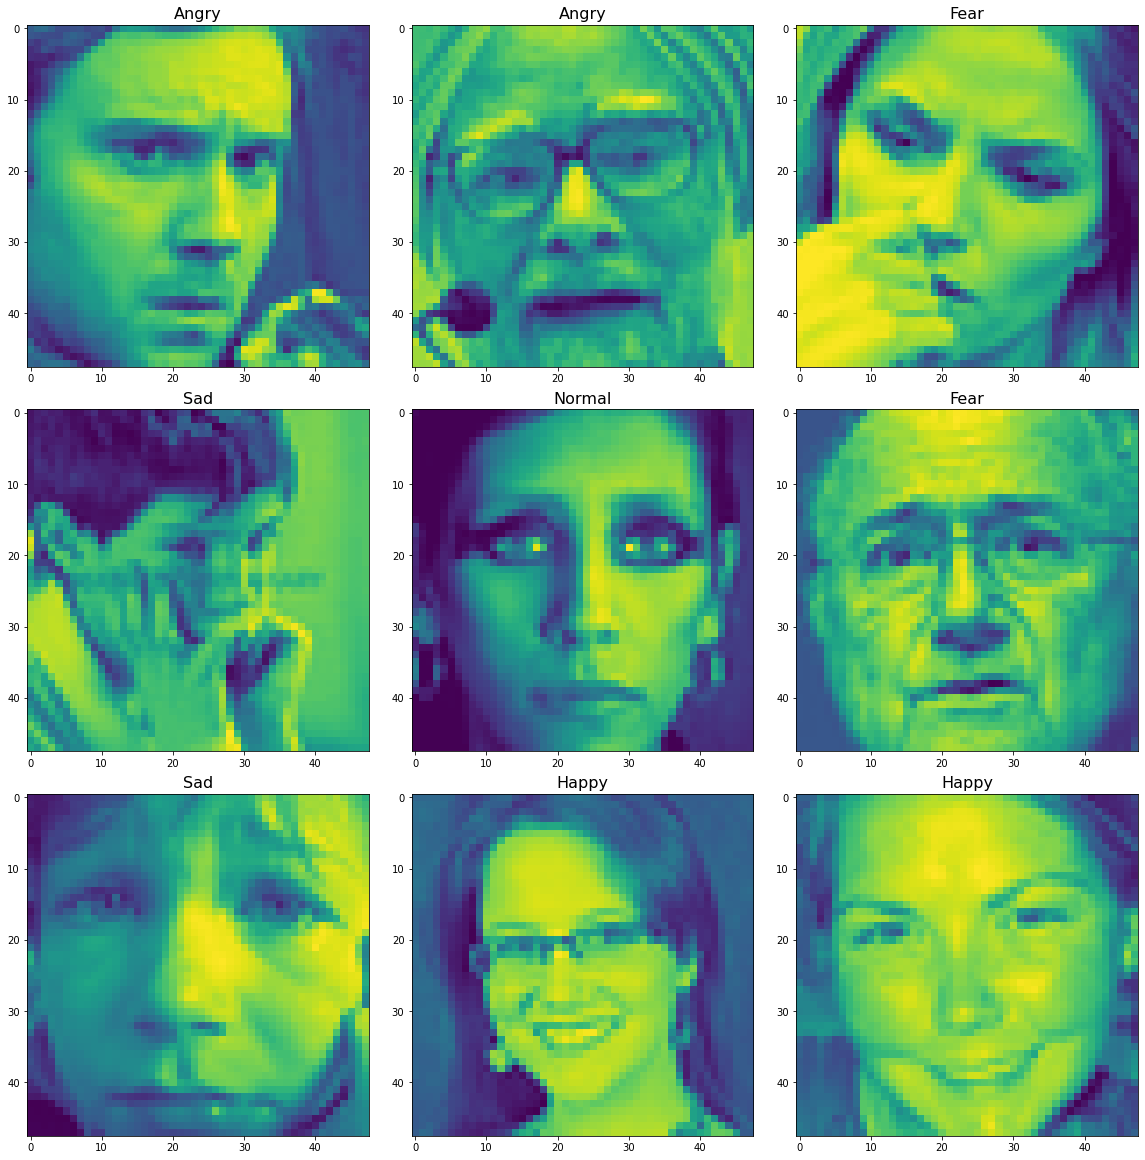

In [111]:
ncols = 3
nrows = 3
dizionario = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Normal"}
fig, axs = plt.subplots(ncols = ncols, nrows = nrows, figsize = (16, 16), constrained_layout = True)
x = 0
for i in range(ncols):
    for j in range(nrows):
        axs[i, j].imshow(lista[x])
        axs[i, j].set_title(dizionario[dati["emotion"][x]], fontsize = 16)
        x += 1

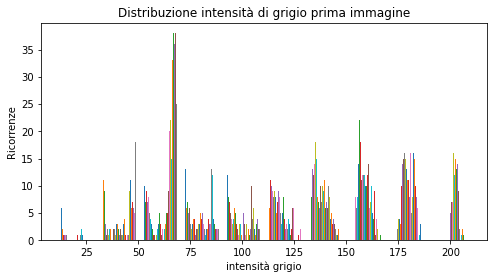

In [113]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.hist(lista[0])
ax.set_xlabel("intensità grigio")
ax.set_ylabel("Ricorrenze")
ax.set_title("Distribuzione intensità di grigio prima immagine")
plt.show()

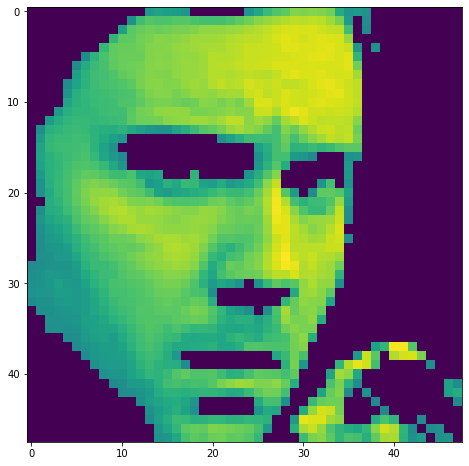

In [115]:
lista[0][lista[0] < 100] = 0
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(lista[0])
plt.show()

# Esercizio 2

In [2]:
n_days = 200
np.random.seed(121)
prezzo_giornaliero = 100. + np.cumsum(np.random.normal(0.1, 1.0, n_days))
prezzo_giornaliero

array([ 99.88796683,  99.70303766,  99.22913946,  98.88882929,
        98.65871873,  99.9424133 , 101.65778623, 102.1248487 ,
       102.21072939, 102.94037119, 104.75001192, 103.52302456,
       104.02489768, 103.93347102, 105.43729698, 103.56852843,
       102.87811327, 102.24539167, 102.43313549, 102.03284949,
       102.63696393, 103.34437003, 104.61081962, 105.53524404,
       102.54851944, 103.8128617 , 104.9955133 , 105.5813093 ,
       104.44642502, 102.6875433 , 103.27569958, 103.76159458,
       103.63507309, 103.84274425, 105.66273946, 106.80353327,
       104.45942679, 104.47360972, 103.62536945, 101.24823498,
       102.41111148, 102.73036201, 103.55629787, 103.67570863,
       102.40291902, 102.9998875 , 103.41243052, 103.79890934,
       102.96331862, 102.16058753, 103.12409476, 104.17420355,
       104.98325081, 105.71172403, 105.78584823, 107.28374117,
       108.04459711, 109.23074061, 109.30027182, 108.70930314,
       107.40623075, 106.12272855, 106.94364554, 107.76

In [3]:
minimi_locali = np.logical_and(np.roll(prezzo_giornaliero, 1) > prezzo_giornaliero, np.roll(prezzo_giornaliero, -1) > prezzo_giornaliero)
minimi_locali

array([False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
       False,  True, False, False,  True, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False,

In [4]:
array_posizioni = np.arange(0, minimi_locali.shape[0])
prezzo_giornaliero[array_posizioni[minimi_locali]]

array([ 98.65871873, 103.52302456, 103.93347102, 102.24539167,
       102.03284949, 102.54851944, 102.6875433 , 103.63507309,
       104.45942679, 101.24823498, 102.40291902, 102.16058753,
       106.12272855, 107.20528186, 104.52951183, 104.65072118,
       102.88639147, 102.94651346, 104.14184196, 106.10056237,
       107.23003725, 109.85115214, 111.31043309, 112.70261878,
       111.93398159, 111.67864805, 111.63405726, 111.61653691,
       111.86082103, 111.78761176, 112.76886486, 112.24066882,
       114.18997774, 113.25370627, 115.15291469, 115.29077505,
       115.95804329, 122.60400625, 124.25399182, 126.60484687,
       126.71409272, 125.4448232 , 126.21383726, 125.89525175,
       121.27379582, 123.18260925, 123.63429703])

In [5]:
massimi_locali = np.logical_and(np.roll(prezzo_giornaliero, 1) < prezzo_giornaliero, np.roll(prezzo_giornaliero, -1) < prezzo_giornaliero)
massimi_locali

array([False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False,  True, False, False, False,
        True, False, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False,  True, False,  True, False, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False, False, False,  True, False, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False,

In [6]:
array_posizioni = np.arange(0, massimi_locali.shape[0])
prezzo_giornaliero[array_posizioni[massimi_locali]]

array([104.75001192, 104.02489768, 105.43729698, 102.43313549,
       105.53524404, 105.5813093 , 103.76159458, 106.80353327,
       104.47360972, 103.67570863, 103.79890934, 109.30027182,
       107.76095024, 108.15587917, 105.44094125, 105.0580952 ,
       102.98912962, 104.81278529, 106.62047007, 107.26521704,
       111.46737164, 112.62178669, 113.73520037, 113.12464481,
       113.02472917, 113.29256503, 112.26934879, 112.7553739 ,
       113.27211283, 112.85475964, 113.95583421, 115.63582669,
       114.54327183, 117.02383199, 116.00547765, 116.33477617,
       123.71625187, 125.02609578, 127.45429127, 126.75122724,
       127.62894555, 126.64060173, 128.56112348, 126.13883116,
       123.4302339 , 125.05560391, 127.65975231])

In [7]:
prezzo_giornaliero[prezzo_giornaliero > 105.].shape[0]

143

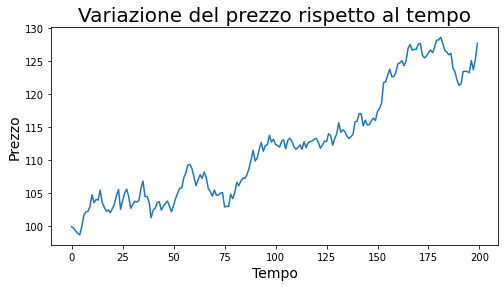

In [8]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.plot(prezzo_giornaliero)
ax.set_xlabel("Tempo", fontsize = 14)
ax.set_ylabel("Prezzo", fontsize = 14)
ax.set_title("Variazione del prezzo rispetto al tempo", fontsize = 20)
plt.show()

In [9]:
variazione_prezzo = np.array(np.roll(prezzo_giornaliero, 1) - prezzo_giornaliero)
variazione_prezzo

array([ 2.77717855e+01,  1.84929170e-01,  4.73898209e-01,  3.40310167e-01,
        2.30110555e-01, -1.28369457e+00, -1.71537293e+00, -4.67062470e-01,
       -8.58806900e-02, -7.29641797e-01, -1.80964074e+00,  1.22698736e+00,
       -5.01873123e-01,  9.14266660e-02, -1.50382596e+00,  1.86876855e+00,
        6.90415162e-01,  6.32721605e-01, -1.87743821e-01,  4.00285999e-01,
       -6.04114441e-01, -7.07406100e-01, -1.26644959e+00, -9.24424421e-01,
        2.98672460e+00, -1.26434226e+00, -1.18265161e+00, -5.85795994e-01,
        1.13488428e+00,  1.75888172e+00, -5.88156281e-01, -4.85894995e-01,
        1.26521488e-01, -2.07671161e-01, -1.81999521e+00, -1.14079381e+00,
        2.34410648e+00, -1.41829340e-02,  8.48240269e-01,  2.37713448e+00,
       -1.16287650e+00, -3.19250534e-01, -8.25935861e-01, -1.19410757e-01,
        1.27278961e+00, -5.96968485e-01, -4.12543021e-01, -3.86478815e-01,
        8.35590717e-01,  8.02731092e-01, -9.63507235e-01, -1.05010878e+00,
       -8.09047261e-01, -

In [10]:
valore = variazione_prezzo.max()
valore

27.771785471525973

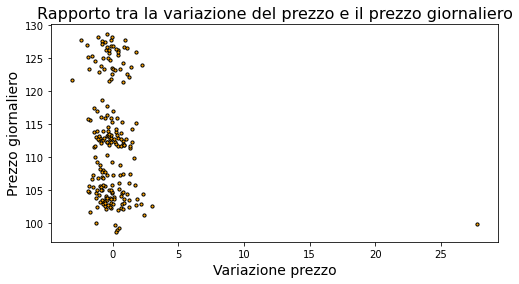

In [11]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.scatter(variazione_prezzo, prezzo_giornaliero, s = 10, c = "orange", edgecolors='black')
ax.set_xlabel("Variazione prezzo", fontsize = 14)
ax.set_ylabel("Prezzo giornaliero", fontsize = 14)
ax.set_title("Rapporto tra la variazione del prezzo e il prezzo giornaliero", fontsize = 16)
plt.show()

# Esercizio 3

In [12]:
x = np.linspace(-3, 3, 100)

In [13]:
f1 = np.exp(-x**2)
f2 = np.exp(-x**2) * np.sin(20 * x)

In [14]:
f3 = np.exp(-x**2) * np.cos(20 * x)

In [15]:
f4 = np.sin(20 * x) / 20

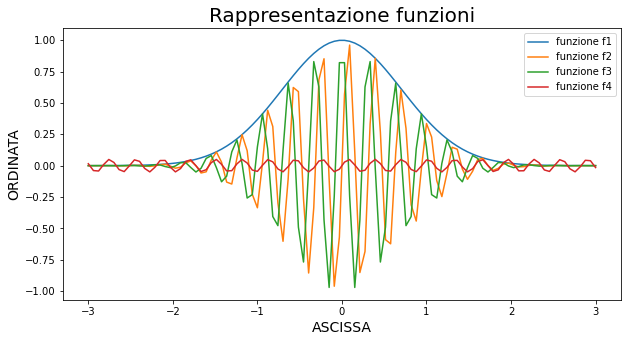

In [16]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.set_title("Rappresentazione funzioni", fontsize = 20)
ax.plot(x, f1, label = "funzione f1")
ax.plot(x, f2, label = "funzione f2")
ax.plot(x, f3, label = "funzione f3")
ax.plot(x, f4, label = "funzione f4")
ax.set_xlabel("ASCISSA", fontsize = 14)
ax.set_ylabel("ORDINATA", fontsize = 14)
x = np.linspace(-3, 3, 100)
ax.legend()
plt.show()